# Problem Statement

#### Venture Capitalist Funding Problem

###### Find the Best Company For Investment - Venture Capitalist Problem
###### We want to understand also which companies perform better based on location, marketing spend, r&d spend and administration

# Importing Dependencies

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Data Preprocessing

In [15]:
df = pd.read_csv("50_Startups.csv")

In [16]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Categorical Data Encoding

In [18]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[3])] , remainder ='passthrough' )
X = np.array(ct.fit_transform(X))

# Test & Train Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

# Training Multiple Linear Regression Model

In [22]:
regressor = LinearRegression()

In [23]:
regressor.fit(X_train, y_train)

LinearRegression()

# Predicting On Results

In [25]:
y_pred = regressor.predict(X_test)

In [26]:
np.set_printoptions(precision = 2)
# Here we want to show the values Vertically not Horizontally
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[114664.42 105008.31]
 [ 90593.16  96479.51]
 [ 75692.84  78239.91]
 [ 70221.89  81229.06]
 [179790.26 191050.39]
 [171576.92 182901.99]
 [ 49753.59  35673.41]
 [102276.66 101004.64]
 [ 58649.38  49490.75]
 [ 98272.03  97483.56]]


In [52]:
# Visualizing The Actual Vs Predicted Performance

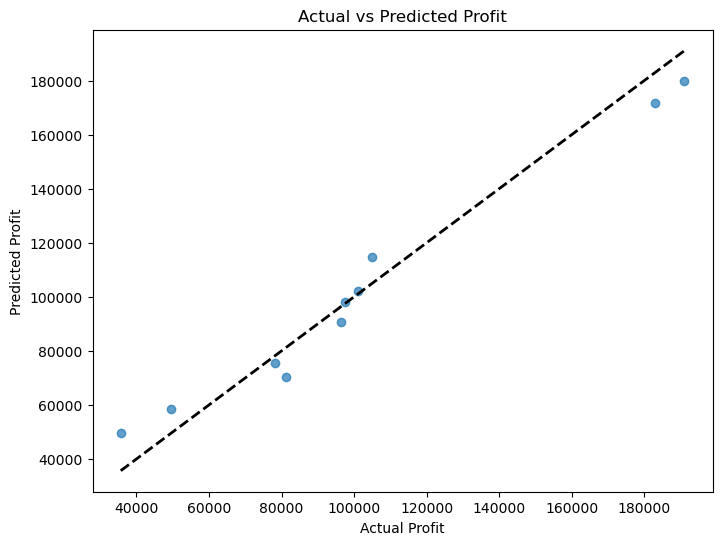

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.show()

In [56]:
# The Values are close to the line.